In [1]:
using Plots; immerse!()
plotDefault!(:size, (500,300));

[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: immerse


In [27]:
# a couple things are happening here... we're pushing new 
# data to our series, and redrawing with gui()
function add_to_plot(plt, rng)
    for x in rng
        push!(plt, x, [randn(), sin(x)])
        # same as:
        #push!(plt, 1, x, randn())
        #push!(plt, 2, x, sin(x))
        #gui(); sleep(0.005)
    end
    gui()
end

function run_push_test(batchsize, numbatch)
    fullrng = linspace(0.2, 2π, numbatch+1)
    println("Testing batchsize=$batchsize numbatch=$numbatch points")
    plt = plot([0,0.1], Any[randn(2),sin], t=[:sticks,:path], w=2)
    
    allms = Float64[]
    for i in 1:numbatch
        rng = linspace(fullrng[i], fullrng[i+1], batchsize)
        t = @elapsed add_to_plot(plt, rng)
        millis = 1000*t
        push!(allms, millis)
        @printf "Millis per update: %1.3f\n" millis
    end
    allms
end

run_push_test (generic function with 1 method)

In [28]:
batchsize, numbatch = 500, 500
ms = run_push_test(batchsize, numbatch);

Testing batchsize=500 numbatch=500 points
Millis per update: 40.079
Millis per update: 15.122
Millis per update: 16.182
Millis per update: 16.608
Millis per update: 18.089
Millis per update: 31.218
Millis per update: 19.448
Millis per update: 21.146
Millis per update: 31.730
Millis per update: 27.839
Millis per update: 32.360
Millis per update: 27.309
Millis per update: 36.093
Millis per update: 41.046
Millis per update: 32.735
Millis per update: 40.209
Millis per update: 47.373
Millis per update: 37.350
Millis per update: 46.302
Millis per update: 49.219
Millis per update: 48.802
Millis per update: 52.275
Millis per update: 54.914
Millis per update: 54.557
Millis per update: 59.209
Millis per update: 57.524
Millis per update: 61.462
Millis per update: 68.913
Millis per update: 68.046
Millis per update: 66.074
Millis per update: 71.676
Millis per update: 78.779
Millis per update: 74.526
Millis per update: 81.386
Millis per update: 80.201
Millis per update: 88.943
Millis per update: 82.

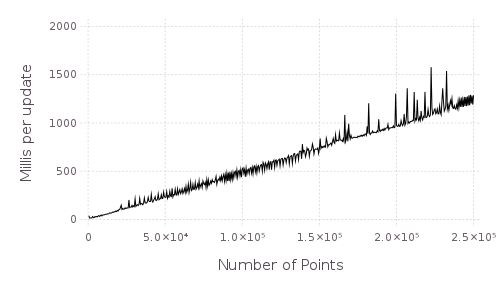

.258


In [29]:
plot((1:numbatch)*batchsize, ms, xlab="Number of Points", ylab="Millis per update", leg=false)

In [ ]:
plt = plot(rand(10,2))

In [ ]:
# append 3 points to the second series
append!(plt, 2,rand(3))

In [ ]:
# pushing a vector will add one to each series
for i in 1:100
    push!(plt, rand(2))
end
plt